In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.optim as optim

# Making the data

## Generating the data

In [ ]:
weight =0.7
bias=0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

## Splitting for Training and Testing

In [ ]:
x_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(X)):]

In [ ]:
x_train.size() ,y_train.size()

(torch.Size([40, 1]), torch.Size([40, 1]))

In [ ]:
def plot_graph(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, predictions=None, prediction_range=None):
  plt.figure(figsize=(5, 5))
  plt.scatter(x_train, y_train, c="b", s=4, label="training data")
  plt.scatter(x_test, y_test, c="g", s=4, label="testing data")
  if predictions is not None:
    if len(predictions) != len(x_test):
      plt.plot(prediction_range, predictions, c="r", label="predictions")
    else:
      plt.scatter(x_test, predictions, s=4, c="r", label="predictions")
  plt.legend(prop={"size": 14})
  plt.show()

## Plotting Initial data

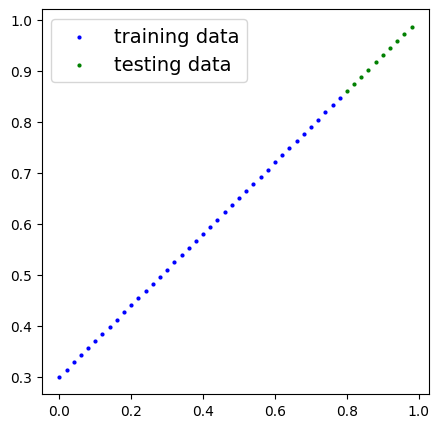

In [ ]:
plot_graph()

# Constructing the Model

## Defining the Linear Model

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True))
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias


## Model Instantiation

In [ ]:
torch.manual_seed(42)
model = LinearRegressionModel()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

## Pre-train predictions

In [ ]:
y_pred = model(x_test)
y_pred[:5]

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914]], grad_fn=<SliceBackward0>)

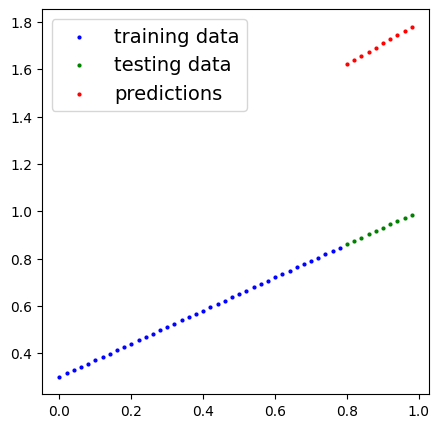

In [ ]:
plot_graph(predictions=y_pred.detach().numpy())

## Loss Function and Optimizer

In [ ]:
loss_fn = nn.MSELoss()  # Mean Squared Error (convex for regression)
optimizer = optim.SGD(params=model.parameters(), lr=0.01)


## Training Loop

In [ ]:
epochs = 2000

# Setting the model to train mode
model.train()

# Training Loop
for epoch in range(epochs):

  # Forward Pass
  y_pred = model(x_train)

  # Computing Loss
  loss= loss_fn(y_pred, y_train)

  # Clearing past gradients
  optimizer.zero_grad()

  # Backpropogating
  loss.backward()

  # Computing Gradients and Updating Weights
  optimizer.step()

  # Validation Step
  model.eval()
  with torch.inference_mode():
    test_pred = model(x_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.47248879075050354 | Test Loss: 0.5755255818367004
Epoch: 100 | Loss: 0.004485415760427713 | Test Loss: 0.002440699841827154
Epoch: 200 | Loss: 0.00017000248772092164 | Test Loss: 0.00027895273524336517
Epoch: 300 | Loss: 0.00010879231558647007 | Test Loss: 0.0004443253274075687
Epoch: 400 | Loss: 9.021181176649407e-05 | Test Loss: 0.0003915414272341877
Epoch: 500 | Loss: 7.504953828174621e-05 | Test Loss: 0.00032768893288448453
Epoch: 600 | Loss: 6.243883399292827e-05 | Test Loss: 0.0002727982646320015
Epoch: 700 | Loss: 5.1946717576356605e-05 | Test Loss: 0.0002269711549161002
Epoch: 800 | Loss: 4.3217667553108186e-05 | Test Loss: 0.00018883339362218976
Epoch: 900 | Loss: 3.595558519009501e-05 | Test Loss: 0.00015710365551058203
Epoch: 1000 | Loss: 2.9913659091107547e-05 | Test Loss: 0.00013070327986497432
Epoch: 1100 | Loss: 2.4886796381906606e-05 | Test Loss: 0.00010873837163671851
Epoch: 1200 | Loss: 2.0704870621557347e-05 | Test Loss: 9.046594641404226e-05
Epoch

## Updated Parameters

In [ ]:
weight, bias = list(model.parameters())
weight, bias

(Parameter containing:
 tensor([0.6906], requires_grad=True),
 Parameter containing:
 tensor([0.3038], requires_grad=True))

## Pedictions

In [ ]:
y_pred = model(x_test)

## Visualize

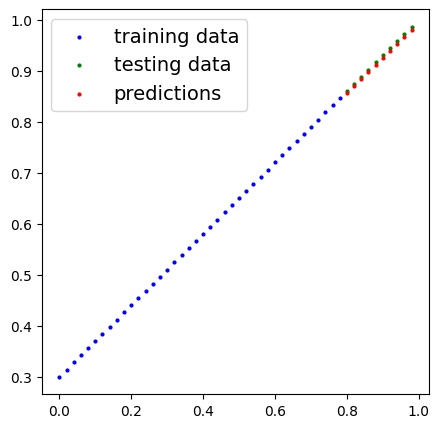

In [ ]:
plot_graph(predictions=y_pred.detach().numpy())

# Real Time Regression Problem

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_dataset.csv")
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
X = torch.tensor(data["YearsExperience"], dtype=torch.float).unsqueeze(dim=1)
y = torch.tensor(data['Salary'], dtype=torch.float).unsqueeze(dim=1)

In [ ]:
X[: 5]

tensor([[1.2000],
        [1.4000],
        [1.6000],
        [2.1000],
        [2.3000]])

In [ ]:
x_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(X))]

# x_test = torch.tensor(X[int(0.8*len(X)):])
# y_test = torch.tensor(y[int(0.8*len(X)):])

In [ ]:
x_train[: 5]

tensor([[1.2000],
        [1.4000],
        [1.6000],
        [2.1000],
        [2.3000]])

In [ ]:
y_train[: 5]

tensor([[39344.],
        [46206.],
        [37732.],
        [43526.],
        [39892.]])

In [ ]:
int(0.8*len(X))

24

In [ ]:
x_test = X[24:]
y_test = y[24:]

In [ ]:
y[: 5]

tensor([[39344.],
        [46206.],
        [37732.],
        [43526.],
        [39892.]])

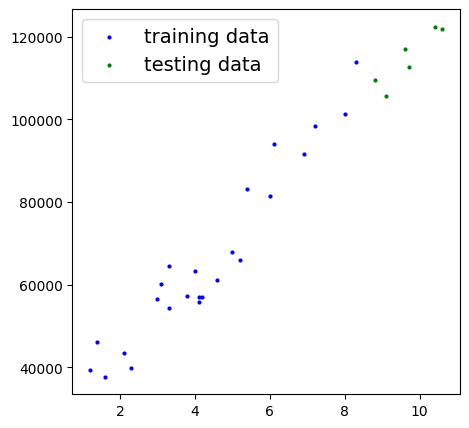

In [ ]:
plot_graph(x_train, y_train, x_test, y_test)

In [ ]:
epochs = 2700

model.train()

# Training Loop
for epoch in range(epochs):

  # forward pass
  y_pred_ = model(x_train)

  # Computing loss
  loss = loss_fn(y_pred_, y_train)

  # Clearing Past gradients
  optimizer.zero_grad()

  # Backpropogation
  loss.backward()

  # Computing gradients and updating weights
  optimizer.step()

  # print(f"Epoch: {epoch} | Loss: {loss}")

In [ ]:
# Printing Updated weights
weight, bias = list(model.parameters())
weight, bias

(Parameter containing:
 tensor([10053.3027], requires_grad=True),
 Parameter containing:
 tensor([22652.8867], requires_grad=True))

In [ ]:
# Making final predictions
y_pred = model(x_test)

In [ ]:
# Printing predictions
y_pred

tensor([[111121.9531],
        [114137.9531],
        [119164.5938],
        [120169.9219],
        [127207.2344],
        [129217.9062]], grad_fn=<AddBackward0>)

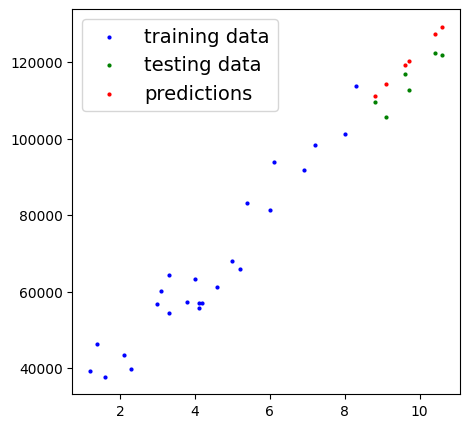

In [ ]:
# Visualizing the predictions
plot_graph(x_train, y_train, x_test, y_test, predictions=y_pred.detach().numpy())

In [ ]:
model

LinearRegressionModel()

In [ ]:
# x-values for prediction line
prediction_range = torch.linspace(0, 10, 300).unsqueeze(dim=1)
prediction_range[:5]

tensor([[0.0000],
        [0.0334],
        [0.0669],
        [0.1003],
        [0.1338]])

In [ ]:
# y-values for prediction line
prediction_line = model(prediction_range)

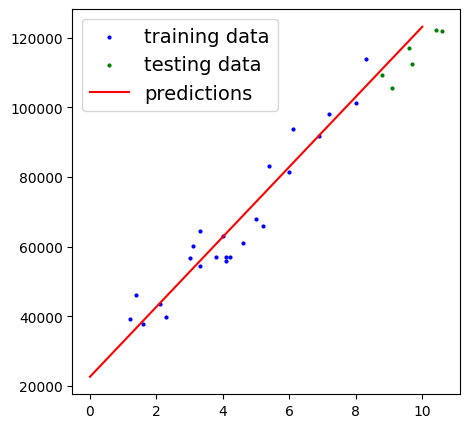

In [ ]:
# Plotting line
plot_graph(x_train, y_train, x_test, y_test, predictions=prediction_line.detach().numpy(), prediction_range=prediction_range.detach().numpy())